<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [9]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [10]:
#I am interested in the average math 4 score data, so I am removing all the missing rows from AVG_MATH_4_SCORE
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math for 4 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [13]:
df["YEAR"].unique()
#There are 33 different years

array([1992, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 1990,
       1996, 2019])

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

Text(0.5, 1.0, '8th grade reading score over time')

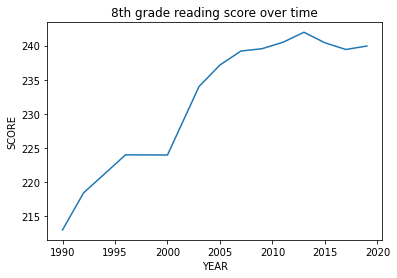

In [14]:
df.groupby('YEAR').AVG_MATH_4_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('8th grade reading score over time')

Text(0.5, 1.0, '4th grade math score over time (Ohio vs. Michigan)')

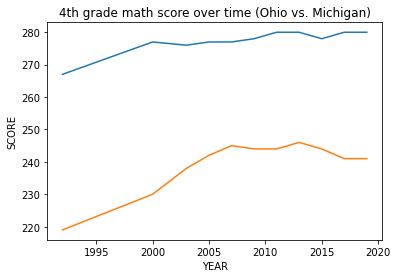

In [15]:
all_states = df["STATE"]
michigan = df["STATE"] == "MICHIGAN"
ohio = df["STATE"] == "OHIO"
df[michigan].set_index('YEAR').groupby('STATE').AVG_MATH_8_SCORE.plot()
df[ohio].set_index('YEAR').groupby('STATE').AVG_MATH_4_SCORE.plot()
plt.ylabel('SCORE')
plt.title('4th grade math score over time (Ohio vs. Michigan)')
#It appears that Michigan has the higher average 4th grade math score over the years.
#Michigan's 4th grade math score over time is on 277 on average whereas Ohio's is about 245 on average.

Find the average for your outcome score across all states in 2019

In [16]:
df["AVG_MATH_4_SCORE"].mean()
#The average math 4 score across all states is 236.3274

236.32743362831857

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [17]:
all_states = df.groupby("STATE")
all_states["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [18]:
# let's create a new variable which represents instruction expenditure per student
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['GRADES_ALL_G']

Final feature list: **<average reading 4 score, instruction expenditure per student>**

Feature selection justification: **<I chose these features because I felt that average scores in other subjects and grades may predict performance in math as a 4th grader. I also chose instruction expenditure per student because I thought the amount of money devoted to instruction-related things may impact the students performance.\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0, 0.5, '4th grade math score')

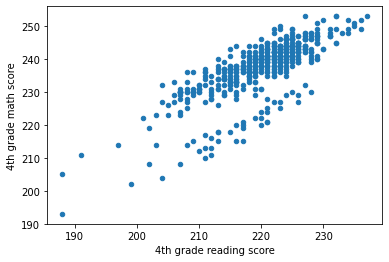

In [19]:
df.plot.scatter(x='AVG_READING_4_SCORE',y='AVG_MATH_4_SCORE')
plt.xlabel('4th grade reading score')
plt.ylabel('4th grade math score')

**<4th grade reading score vs. 4th grade math score>**

**Visualization 2**

Text(0, 0.5, '4th grade math score')

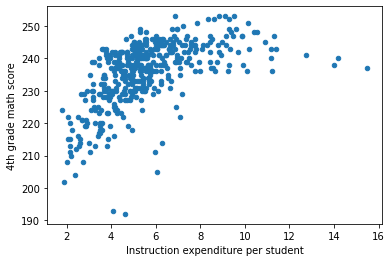

In [20]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT',y='AVG_MATH_4_SCORE')
plt.xlabel('Instruction expenditure per student')
plt.ylabel('4th grade math score')

**<Instruction expenditure per student vs. 4th grade math score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df[['AVG_READING_4_SCORE','INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [24]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [25]:
# create your model here
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [1]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

/Users/rachelabellera/Documents/mdst_setup/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Math 4 Score')

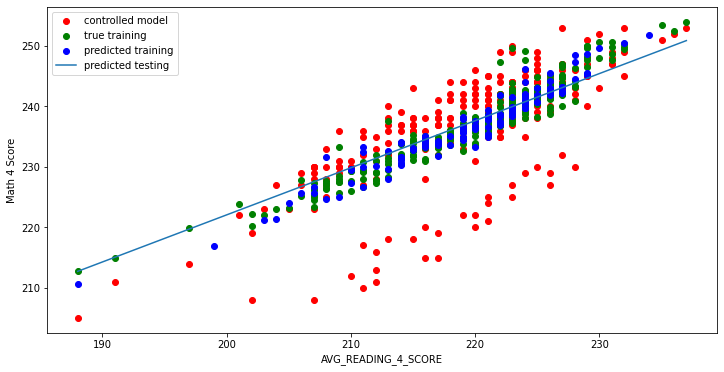

In [30]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.

#I want to predict math 4 scores based on the average reading 4 score. 

col_name = 'AVG_READING_4_SCORE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')

In [31]:
print(model.intercept_)
print(model.coef_)

60.073850382720934
[0.77861926 1.03342485]


In [32]:
# R**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.7227086355028796

In [33]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.3041078017461925

<h2> Summary </h2>

**<I decided to focus on Math for 4th graders. The features I picked were instruction expenditure per student and Reading for 4th graders. I believe they are equally important. I think I should scale the data.  I created two scatterplots. One showed the relationship between math for grade 4 and reading for grade 4 and the other showed the relationship between math for grade 4 and instruction expenditure per student. Both scatterplots appeared to have a positive correlation. However, there seemed to be a stronger relationship between the variables, math for grade 4 and reading for grade 4. I decided to do a regression task in order to predict math 4 scores. The R-square value is 0.7227 and close to 1, which shows the linear model fits the data well. The mean error for the regression model is 0.304107, which is fairly small, and means that there was not much of a difference between the model's predicted training and the actual data. Therefore, it appears that average reading 4 score was a good indicator of math 4 score since the predicted and true training plots were very similar on the regression model.>**